In [1]:
import keras

Using TensorFlow backend.


In [2]:
import os, shutil

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './simpsons_small'   
    
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

simpson_labels = os.listdir(train_dir)

In [9]:
from keras import layers
from keras import models
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [10]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=60,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/50
60/60 [==============================] - 62s 1s/step - loss: 1.3032 - acc: 0.3964 - val_loss: 0.6848 - val_acc: 0.7433
Epoch 2/50
60/60 [==============================] - 62s 1s/step - loss: 0.4215 - acc: 0.8483 - val_loss: 0.3013 - val_acc: 0.8967
Epoch 3/50
60/60 [==============================] - 64s 1s/step - loss: 0.2298 - acc: 0.9231 - val_loss: 0.1752 - val_acc: 0.9346
Epoch 4/50
60/60 [==============================] - 63s 1s/step - loss: 0.1355 - acc: 0.9625 - val_loss: 0.1911 - val_acc: 0.9333
Epoch 5/50
60/60 [==============================] - 63s 1s/step - loss: 0.1245 - acc: 0.9661 - val_loss: 0.2495 - val_acc: 0.9267
Epoch 6/50
60/60 [==============================] - 64s 1s/step - loss: 0.1251 - acc: 0.9644 - val_loss: 0.2013 - val_acc: 0.9423
Epoch 7/50
60/60 [==============================] - 64s 1s/step - loss: 0.0732 - acc: 0.9800 - val_loss: 0.3632 - val_acc: 0.9133
Epoch 8/50
60/60 [==============================] - 64s 1s/step - loss: 0.0945 - acc: 0.97

In [13]:
model.save('simpson_v1.h5')

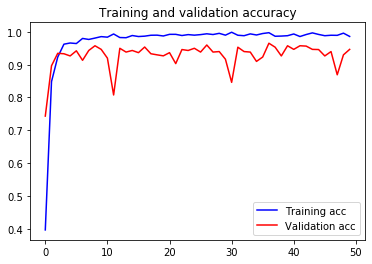

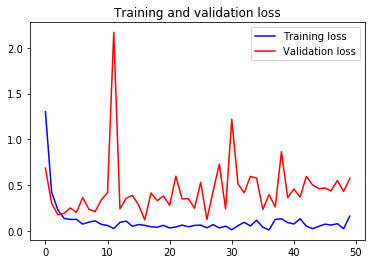

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 600 images belonging to 4 classes.
test acc: 0.9499999940395355


In [21]:
from PIL import Image
import numpy as np
# 이미지 열기
im = Image.open('test_image/220x220.jfif')
 
# 이미지 크기 출력
print(im.size)
# 전처리 
im.thumbnail((150,150))
im = np.array(im)
im = im/255
im = im.reshape(1,150,150,3)


print(model.predict(im).astype(float))
print(model.predict_classes(im))

(220, 220)
[[0.11216837 0.41005975 0.44948089 0.02829089]]
[2]


In [5]:
# 이미지 파일 불러오기
from keras.preprocessing import image
import numpy as np


img = image.load_img('test_image/man.jfif', target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)



(1, 150, 150, 3)


In [6]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
K.set_session(tf.Session(config=config))

from keras.models import load_model

model = load_model('simpson_v1.h5')
print(simpson_labels)
print((model.predict(img_tensor).astype(float)))
print(model.predict_classes(img_tensor))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
['bart_simpson', 'homer_simpson', 'lisa_simpson', 'marge_simpson']
[[1.33662208e-04 9.99756753e-01 6.14945602e-05 4.80289491e-05]]
[1]


In [13]:
for i in range(4):
    print('{0}\t {1:.4f}' .format(simpson_labels[i], model.predict(img_tensor)[0][i]))
print('\nresult : ', simpson_labels[model.predict_classes(img_tensor)[0]])

bart_simpson	 0.0001
homer_simpson	 0.9998
lisa_simpson	 0.0001
marge_simpson	 0.0000

result :  homer_simpson


(1, 150, 150, 3)
bart_simpson	 0.0000
homer_simpson	 1.0000
lisa_simpson	 0.0000
marge_simpson	 0.0000

result :  homer_simpson


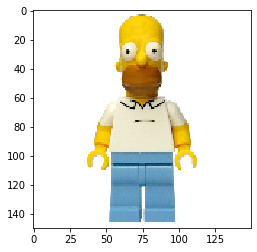

In [47]:
# 이미지 파일 불러오기
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.backend import tensorflow_backend as K
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

test_file_name = 'man.jfif.jpg'
img = image.load_img('test_image/%s'%test_file_name, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
K.set_session(tf.Session(config=config))

model = load_model('simpson_v1.h5')


for i in range(4):
    print('{0}\t {1:.4f}' .format(simpson_labels[i], model.predict(img_tensor)[0][i]))
print('\nresult : ', simpson_labels[model.predict_classes(img_tensor)[0]])

plt.imshow(img)
plt.show()

In [31]:
a=[]
print('{0}\t {1:.4f}' .format(simpson_labels[0], model.predict(img_tensor)[0][0]))
simpson_labels[0]+"\n"+str(round(model.predict(img_tensor)[0][0]*100,2))+"%"

bart_simpson	 0.0000


'bart_simpson\n0.0%'

In [68]:
a=[]
for i in range(4):
    a.append(simpson_labels[i]+"    "+str(round(model.predict(img_tensor)[0][i]*100,3))+"%")


a.append('\nresult : '+simpson_labels[model.predict_classes(img_tensor)[0]])
id='\n'.join(a)
print(id)

bart_simpson    0.0%
homer_simpson    100.0%
lisa_simpson    0.0%
marge_simpson    0.0%

result : homer_simpson


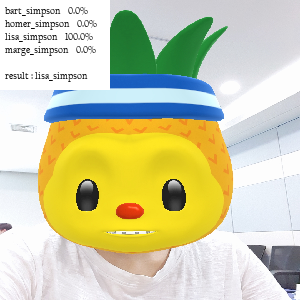

In [6]:
# 이미지 파일 불러오기
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.backend import tensorflow_backend as K
from keras.models import load_model
import matplotlib.pyplot as plt

test_file_name = 'KakaoTalk_20190718_145658889_04.jpg'
img = image.load_img('test_image/%s'%test_file_name, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#print(img_tensor.shape)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
K.set_session(tf.Session(config=config))

model = load_model('simpson_v1.h5')

a=[]
for i in range(4):
    a.append(simpson_labels[i]+"    "+str(round(model.predict(img_tensor)[0][i]*100,3))+"%")


a.append('\nresult : '+simpson_labels[model.predict_classes(img_tensor)[0]])
id='\n'.join(a)

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
im_sample = Image.new("RGB", (110,90),(255,255,255))
draw = ImageDraw.Draw(im_sample)
# font = ImageFont.truetype(<font-file>, <font-size>)

font = ImageFont.truetype("CALIFR.TTF", 10)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((5, 5),id,(0,0,0),font=font)

img = image.load_img('test_image/%s'%test_file_name, target_size=(300,300))
img.paste(im_sample)
img.save('sample-out.jpg')
img

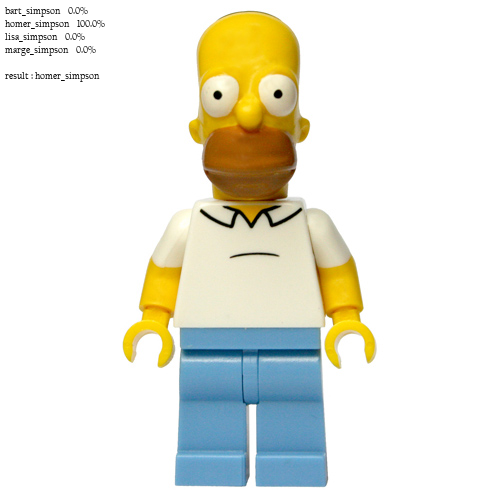

In [82]:
img = image.load_img('test_image/%s'%test_file_name)
img.paste(im_sample)

img.save('sample-out.jpg')
img